# EDA (Exploratory Data Analysis)
Referensi Bacaaan
- https://www.geeksforgeeks.org/univariate-bivariate-and-multivariate-data-and-its-analysis/ Univariate, Bivariate, Multivariate
- https://python-graph-gallery.com buat seaborn,matplotlib, wordcloud
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html buat pandas
- https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html buat pandas pivot table

### GOALS
- Get an overall analysis of the company product to determine which product is the best to sell when and where

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
final = pd.read_csv(r'D:\Belajar\Purwadhika\JCDS10\Data Science\Jupyter Notebook\FINAL PROJECT\final.csv', parse_dates=True, index_col=0)

In [3]:
final.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,transaction_id,product_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
transaction_date,,,,,,,,,,,,,,,,,,,,,
2017-07-01,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,No,...,1039.0,8.0,True,Approved,Solex,Road,medium,small,1703.52,1516.13
2017-08-22,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,No,...,1107.0,15.0,False,Approved,Norco Bicycles,Standard,low,medium,958.74,748.90
2017-04-07,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,No,...,2638.0,83.0,False,Approved,Solex,Touring,medium,large,2083.94,675.03
2017-02-13,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,No,...,9044.0,12.0,False,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60
2017-06-25,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,No,...,9792.0,60.0,True,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85


In [4]:
final.columns

Index(['customer_id', 'name', 'gender', 'past_3_years_bike_related_purchases',
       'age', 'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'address', 'postcode', 'state',
       'country', 'property_valuation', 'transaction_id', 'product_id',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost'],
      dtype='object')

In [5]:
final_desc = []

for i in final.columns:
    final_desc.append([
        i,
        final[i].dtypes,
        final[i].isna().sum(),
        round(((final[i].isna().sum())/ (len(final))*100),2),
        final[i].nunique(),
        final[i].unique()
    ])
final_desc = pd.DataFrame(final_desc, columns = ['Data Features', 'Data Types', 'NaN', 'NaN Percentage', 'Unique', 'Unique Sample'])

In [6]:
final_desc

,Data Features,Data Types,NaN,NaN Percentage,Unique,Unique Sample
0,customer_id,int64,0,0.0,3491,"[34, 144, 168, 267, 290, 451, 453, 454, 480, 5..."
1,name,object,0,0.0,3489,"[Jephthah Bachmann, Jory Barrabeale, Reggie Br..."
2,gender,object,0,0.0,2,"[Male, Female]"
3,past_3_years_bike_related_purchases,int64,0,0.0,100,"[59, 71, 8, 53, 42, 37, 81, 58, 67, 30, 9, 84,..."
4,age,float64,0,0.0,54,"[43.0, 120.0, 88.0, 84.0, 79.0, 76.0, 66.0, 65..."
5,job_title,object,0,0.0,195,"[Legal Assistant, Environmental Tech, General ..."
6,job_industry_category,object,0,0.0,9,"[IT, Health, Financial Services, Manufacturing..."
7,wealth_segment,object,0,0.0,3,"[Affluent Customer, Mass Customer, High Net Wo..."
8,deceased_indicator,object,0,0.0,2,"[N, Y]"
9,owns_car,object,0,0.0,2,"[No, Yes]"


In [7]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,19442.0,1738.958903,1011.139208,1.00,857.00,1741.00,2615.00,3500.00
past_3_years_bike_related_purchases,19442.0,48.788653,28.586429,0.00,24.00,48.00,73.00,99.00
age,19442.0,43.997274,16.920464,18.00,33.00,43.00,53.00,120.00
postcode,19442.0,2991.358451,852.625293,2000.00,2200.00,2768.00,3756.00,4883.00
transaction_id,19442.0,9988.593355,5779.658271,1.00,4975.25,9984.50,14995.75,20000.00
product_id,19442.0,45.804804,30.569061,0.00,18.00,45.00,72.00,100.00
list_price,19442.0,1107.429884,582.655811,12.01,575.27,1163.89,1635.30,2091.47
standard_cost,19442.0,555.606674,405.618141,7.21,215.14,507.58,795.10,1759.85


### Melihat Data Outliers

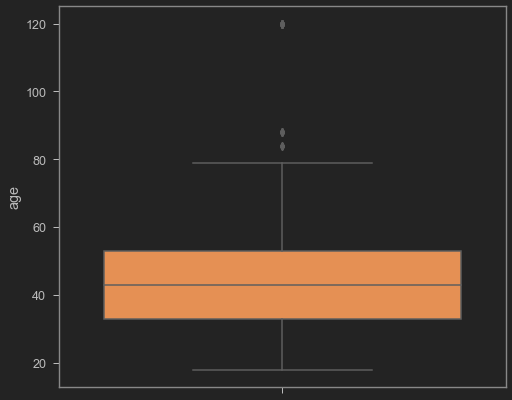

In [8]:
sns.boxplot(y= final['age'], orient ='v', palette = 'YlOrRd')

plt.show() # Terlihat ada umur yang isinya 120, kemungkinan umurnya memang segitu atau ada salah pengetikan/typo pada saat input. 

In [9]:
final[final['age'] == 120]['name'].nunique() # Jika ditelaah Ada 76 nama yang umurnya 120, maka safe to assume bahwa ini adalah typo pada saat input

76

In [10]:
age_mode = final['age'].median() # Mengambil median umur sebagai pengganti 120
age_mode

43.0

In [11]:
final[final['age'] == 120] = final[final['age'] == 120].replace(120, age_mode)

In [12]:
final[final['age'] == 120]

,customer_id,name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,transaction_id,product_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
transaction_date,,,,,,,,,,,,,,,,,,,,,


In [13]:
print(f'Baris {final.shape[0]:,}')
print('Kolom',final.shape[1])

Baris 19,442
Kolom 25


### Melihat Korelasi antar Numerikal Feature

In [14]:
final.corr()

,customer_id,past_3_years_bike_related_purchases,age,postcode,transaction_id,product_id,online_order,list_price,standard_cost
customer_id,1.000000,0.001654,-0.026618,0.019593,0.002407,0.004126,0.003722,0.012200,0.007048
past_3_years_bike_related_purchases,0.001654,1.000000,-0.039629,-0.015684,-0.003436,-0.000829,0.002625,0.007643,-0.008328
age,-0.026618,-0.039629,1.000000,-0.017153,-0.006847,-0.006719,-0.005110,-0.002702,0.000801
postcode,0.019593,-0.015684,-0.017153,1.000000,0.004731,0.011029,-0.000797,0.013313,0.010478
transaction_id,0.002407,-0.003436,-0.006847,0.004731,1.000000,-0.011464,0.001808,-0.006287,-0.002276
product_id,0.004126,-0.000829,-0.006719,0.011029,-0.011464,1.000000,-0.005704,0.089870,0.038758
online_order,0.003722,0.002625,-0.005110,-0.000797,0.001808,-0.005704,1.000000,-0.001087,0.006882
list_price,0.012200,0.007643,-0.002702,0.013313,-0.006287,0.089870,-0.001087,1.000000,0.551654
standard_cost,0.007048,-0.008328,0.000801,0.010478,-0.002276,0.038758,0.006882,0.551654,1.000000


In [15]:
finale = final.copy()

In [16]:
finale['profit'] = finale['list_price'] - finale['standard_cost'] 

In [17]:
finale.sample(10)

,customer_id,name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,product_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit
transaction_date,,,,,,,,,,,,,,,,,,,,,
2017-12-06,1884,Aurore Buckmaster,Female,19,50.0,Chemical Engineer,Manufacturing,Mass Customer,N,Yes,...,17.0,True,Approved,Solex,Standard,high,medium,1024.66,614.80,409.86
2017-11-23,432,Amby Pentin,Male,83,30.0,Nuclear Power Engineer,Manufacturing,Affluent Customer,N,Yes,...,99.0,True,Approved,OHM Cycles,Standard,medium,medium,1227.34,770.89,456.45
2017-02-17,294,Magnum Slowan,Male,39,61.0,Recruiting Manager,Manufacturing,High Net Worth,N,No,...,77.0,True,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,1660.88
2017-05-20,2459,Jeanna Naulls,Female,67,34.0,Quality Engineer,Manufacturing,High Net Worth,N,No,...,96.0,True,Approved,Giant Bicycles,Standard,medium,large,1635.30,993.66,641.64
2017-12-03,2085,Carolynn Samsin,Female,83,64.0,Pharmacist,Health,Mass Customer,N,No,...,82.0,True,Approved,Norco Bicycles,Standard,high,medium,1148.64,689.18,459.46
2017-07-10,1907,Lind Dredge,Male,69,45.0,VP Sales,Health,High Net Worth,N,No,...,43.0,True,Approved,Norco Bicycles,Standard,medium,medium,1555.58,818.01,737.57
2017-05-16,1952,Patrica Donativo,Female,35,46.0,Payment Adjustment Coordinator,Health,Mass Customer,N,Yes,...,82.0,False,Approved,Norco Bicycles,Standard,high,medium,1148.64,689.18,459.46
2017-07-24,2068,Wandie Nare,Female,23,63.0,Account Representative I,Manufacturing,High Net Worth,N,No,...,0.0,False,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,110.81
2017-02-15,997,Ambros Kernes,Male,30,38.0,Teacher,Telecommunications,Mass Customer,N,Yes,...,34.0,False,Approved,Norco Bicycles,Road,high,large,774.53,464.72,309.81


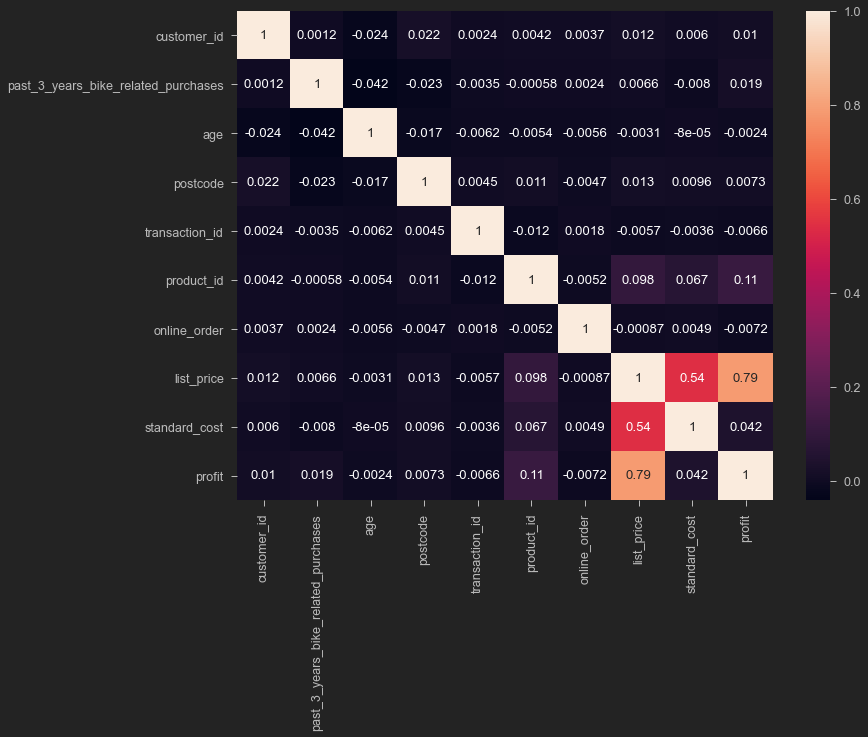

In [18]:
plt.figure(figsize=(12,9))
sns.heatmap(finale.corr('spearman'),annot=True);

- Numerikal feature yang akan diambil adalah Cost, Sales dan Profit
- Selain ketiga itu tadi,cust id, online order, past_3_years dan age yang lain akan di drop

In [19]:
finale.drop(columns = ['postcode','transaction_id','product_id'],inplace=True)

In [20]:
finale.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit
transaction_date,,,,,,,,,,,,,,,,,,,,,
2017-07-01,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,No,...,8.0,True,Approved,Solex,Road,medium,small,1703.52,1516.13,187.39
2017-08-22,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,No,...,8.0,False,Approved,Norco Bicycles,Standard,low,medium,958.74,748.90,209.84
2017-04-07,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,No,...,8.0,False,Approved,Solex,Touring,medium,large,2083.94,675.03,1408.91
2017-02-13,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,No,...,8.0,False,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,1069.55
2017-06-25,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,No,...,8.0,True,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,217.51


### NUMERICAL FEATURE
- Melihat Sekilas Pesebaran Data Numerical Feature

In [21]:
finale.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,19442.0,1738.958903,1011.139208,1.00,857.00,1741.00,2615.00,3500.00
past_3_years_bike_related_purchases,19442.0,48.788653,28.586429,0.00,24.00,48.00,73.00,99.00
age,19442.0,42.294260,12.476368,18.00,33.00,43.00,51.00,88.00
list_price,19442.0,1107.429884,582.655811,12.01,575.27,1163.89,1635.30,2091.47
standard_cost,19442.0,555.606674,405.618141,7.21,215.14,507.58,795.10,1759.85
profit,19442.0,551.823210,493.216490,4.80,133.78,445.21,830.24,1702.55


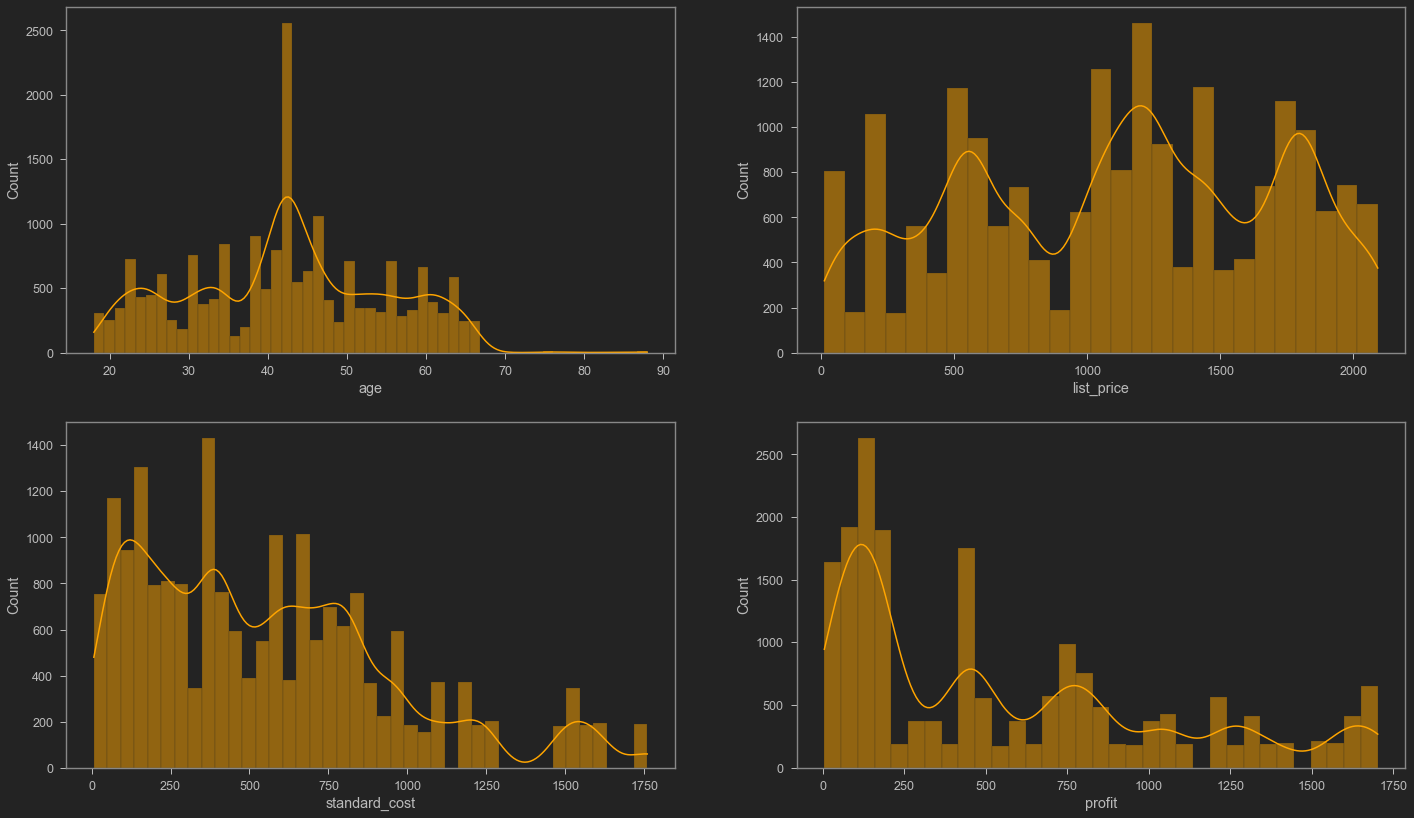

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(24, 14))
for variable, subplot in zip(['age','list_price','standard_cost','profit'],ax.flatten()):
    sns.histplot(finale[variable],kde=True, ax=subplot,color='Orange');

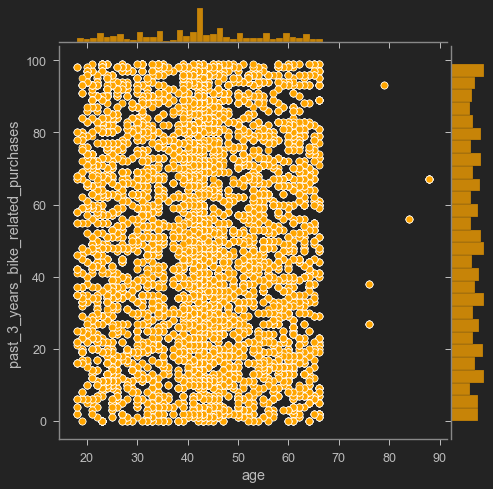

In [23]:
# sns.histplot(x = finale['past_3_years_bike_related_purchases'],y=finale['age'],color='Orange');
sns.jointplot(x = 'age', y = 'past_3_years_bike_related_purchases', data = finale, color='Orange',height=7,ratio=10,space=0.1);
plt.show()

- Dari graph diatas, density dari umur paling banyak itu di 42-44 tahun
- Menarik jika melihat list_price yang pesebarannya tidak beraturan, sedangkan dari standard cost terlihat semakin mahal costnya semakin sedikit jumlahnya
- Untuk profit paling pesebaran datanya banyak di angka 250 kebawah

### Categorical Feature

In [24]:
cat_feature = [feature for feature in finale.columns if finale[feature].dtypes == 'O']
finale[cat_feature].head()

,name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,state,country,property_valuation,order_status,brand,product_line,product_class,product_size
transaction_date,,,,,,,,,,,,,,,,
2017-07-01,Jephthah Bachmann,Male,Legal Assistant,IT,Affluent Customer,N,No,833 Luster Way,QLD,Australia,8.0,Approved,Solex,Road,medium,small
2017-08-22,Jephthah Bachmann,Male,Legal Assistant,IT,Affluent Customer,N,No,833 Luster Way,QLD,Australia,8.0,Approved,Norco Bicycles,Standard,low,medium
2017-04-07,Jephthah Bachmann,Male,Legal Assistant,IT,Affluent Customer,N,No,833 Luster Way,QLD,Australia,8.0,Approved,Solex,Touring,medium,large
2017-02-13,Jephthah Bachmann,Male,Legal Assistant,IT,Affluent Customer,N,No,833 Luster Way,QLD,Australia,8.0,Approved,WeareA2B,Standard,medium,medium
2017-06-25,Jephthah Bachmann,Male,Legal Assistant,IT,Affluent Customer,N,No,833 Luster Way,QLD,Australia,8.0,Approved,Giant Bicycles,Standard,high,small


In [25]:
finale.describe(include='O').T

,count,unique,top,freq
name,19442,3489,Corabelle,18
gender,19442,2,Female,9873
job_title,19442,195,Chemical Engineer,931
job_industry_category,19442,9,Manufacturing,7032
wealth_segment,19442,3,Mass Customer,9765
deceased_indicator,19442,2,N,19434
owns_car,19442,2,Yes,9799
address,19442,3485,3 Mariners Cove Terrace,40
state,19442,3,NSW,10364
country,19442,1,Australia,19442


### Online Order Distribution
Melihat produk yang terjual dari ***Jenis Orderannya***

#### Mengubah Online Order dtypes from boolean to str

In [26]:
finale[finale['online_order']==True] = finale[finale['online_order']==True].replace(True,'Yes')
finale[finale['online_order']==False] = finale[finale['online_order']==False].replace(False,'No')

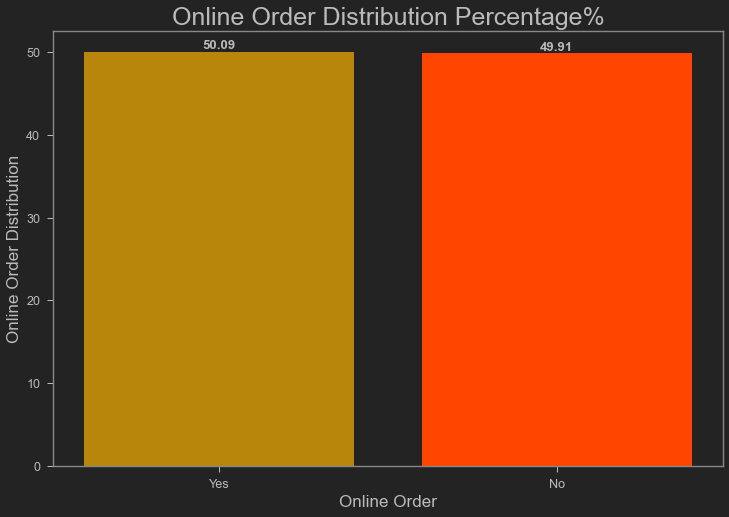

In [27]:
online_order = round(finale['online_order'].value_counts(normalize= True) * 100,2)
x = online_order.index
y = online_order.values
plt.figure(figsize=(12,8))  
plt.bar(x, y,color=['#B8860B','#FF4500']);
plt.xlabel('Online Order',fontdict={'fontsize': 17})
plt.ylabel('Online Order Distribution',fontdict={'fontsize': 17}) 
plt.title('Online Order Distribution Percentage%', fontdict={'fontsize': 25})
for i, v in enumerate(y):   # Untuk Menampilkan angka persentasenya
    plt.text(i-0.05,v+0.3,v,fontweight='bold')

In [28]:
# online = finale[finale['online_order'] ==  'Yes']
# offline = finale[finale['online_order'] ==  'No']

In [29]:
finale.groupby('online_order')[['list_price']].sum()

,list_price
online_order,
No,10751548.01
Yes,10779103.79


In [30]:
pd.crosstab(index =finale['brand'], columns=finale['online_order'],values=finale['list_price'],aggfunc='mean')

online_order,No,Yes
brand,,
Giant Bicycles,1235.867126,1234.685085
Norco Bicycles,922.282353,903.956189
OHM Cycles,980.215726,981.154410
Solex,1064.690580,1045.393258
Trek Bicycles,1181.107852,1189.972164
WeareA2B,1249.835491,1278.906557


In [31]:
finale.pivot_table(index ='online_order', columns=['brand'],aggfunc='mean').T.iloc[12:]

online_order                                                 No          Yes
                                    brand                                   
list_price                          Giant Bicycles  1235.867126  1234.685085
                                    Norco Bicycles   922.282353   903.956189
                                    OHM Cycles       980.215726   981.154410
                                    Solex           1064.690580  1045.393258
                                    Trek Bicycles   1181.107852  1189.972164
                                    WeareA2B        1249.835491  1278.906557
past_3_years_bike_related_purchases Giant Bicycles    48.583541    49.541463
                                    Norco Bicycles    47.549481    48.415667
                                    OHM Cycles        48.179469    48.675641
                                    Solex             49.803395    48.749878
                                    Trek Bicycles     47.765466    49.395205
                                    WeareA2B          49.779755    48.413003
profit                              Giant Bicycles   481.445299   468.857921
                                    Norco Bicycles   304.825516   291.241108
                                    OHM Cycles       494.498987   477.797840
                                    Solex            571.140561   559.031260
                                    Trek Bicycles    616.601421   616.644116
                                    WeareA2B         827.231080   847.863170
standard_cost                       Giant Bicycles   754.421827   765.827165
                                    Norco Bicycles   617.456837   612.715081
                                    OHM Cycles       485.716739   503.356571
                                    Solex            493.550019   486.361998
                                    Trek Bicycles    564.506431   573.328048
                                    WeareA2B         422.604411   431.043387

In [32]:
finale.pivot_table(index ='online_order', columns=['brand'], values='list_price',aggfunc='mean').T

online_order,No,Yes
brand,,
Giant Bicycles,1235.867126,1234.685085
Norco Bicycles,922.282353,903.956189
OHM Cycles,980.215726,981.154410
Solex,1064.690580,1045.393258
Trek Bicycles,1181.107852,1189.972164
WeareA2B,1249.835491,1278.906557


In [33]:
# finale.pivot_table(index ='online_order', columns=['brand'], values='list_price',aggfunc='median')

In [34]:
finale.pivot_table(index ='online_order', columns=['brand'], values='standard_cost',aggfunc='sum')

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
online_order,,,,,,
No,1210092.61,892225.13,695546.37,1046819.59,830388.96,688845.19
Yes,1255956.55,868217.27,785236.25,995583.01,837058.95,696135.07


In [35]:
finale.pivot_table(index ='online_order', columns=['brand'], values='profit',aggfunc='mean')

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
online_order,,,,,,
No,481.445299,304.825516,494.498987,571.140561,616.601421,827.23108
Yes,468.857921,291.241108,477.797840,559.031260,616.644116,847.86317


In [36]:
# finale.pivot_table(index ='online_order', columns=['brand'], values='profit',aggfunc='median')

In [37]:
finale[finale['brand']=='WeareA2B'].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,3245.0,1734.436672,1015.232379,2.00,868.00,1730.00,2629.00,3500.00
past_3_years_bike_related_purchases,3245.0,49.099538,28.553090,0.00,24.00,48.00,73.00,99.00
age,3245.0,42.346379,12.349047,18.00,33.00,43.00,51.00,88.00
list_price,3245.0,1264.303834,546.665957,60.34,1065.03,1292.84,1762.96,1992.93
standard_cost,3245.0,426.804394,377.330755,13.44,131.92,260.14,762.63,1259.36
profit,3245.0,837.499439,534.293146,15.08,155.65,834.94,1230.30,1660.88


> Setelah Ditelusuri ternyata distribusi penjualan Online dan Offline hampir tidak ada perbedannya, distribusinya merata

#### Categorical Feature Vs Price, Cost, Profit
- **Brand Name**

In [38]:
brand_name = finale['brand'].unique().tolist()
brand_name

['Solex',
 'Norco Bicycles',
 'WeareA2B',
 'Giant Bicycles',
 'Trek Bicycles',
 'OHM Cycles']

In [39]:
# Amount = pd.crosstab(index=[finale['online_order'],finale['brand']], columns='Amount')
# Amount = Amount.reset_index()

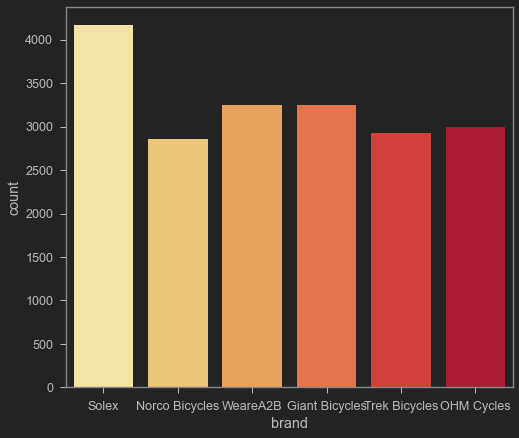

In [40]:
sns.countplot(data = finale, x = 'brand', palette='YlOrRd');

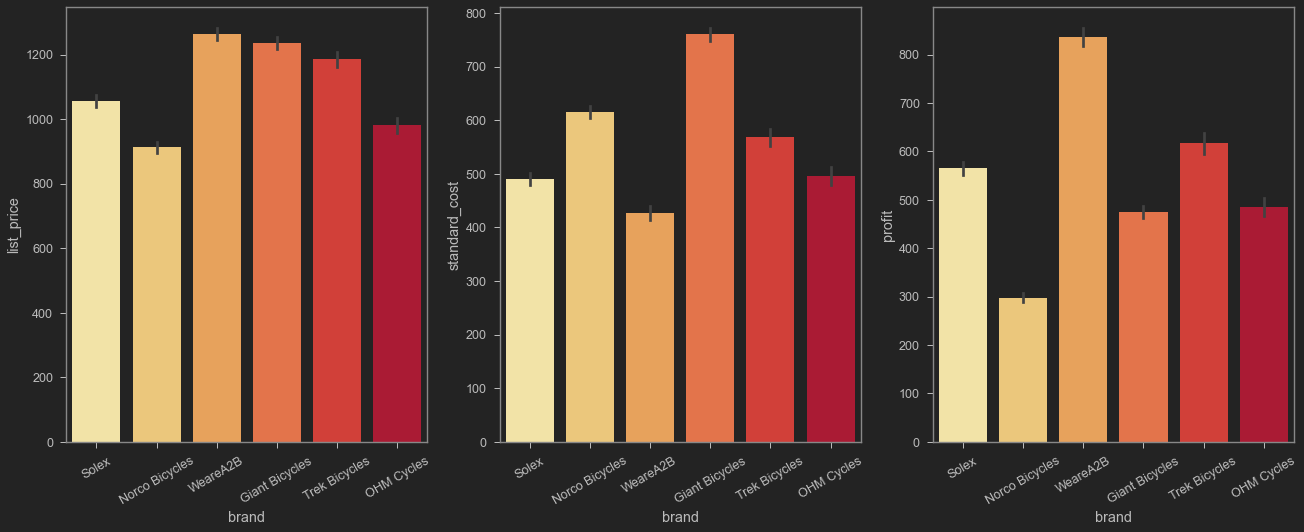

In [41]:
def cntplt(feature):
    sns.barplot(data = finale, x = 'brand',y= feature, palette='YlOrRd')
    plt.xticks(rotation=30)
    
plt.figure(figsize = (22,8))
plt.subplot(1,3,1)
cntplt('list_price')

plt.subplot(1,3,2)
cntplt('standard_cost')

plt.subplot(1,3,3)
cntplt('profit')

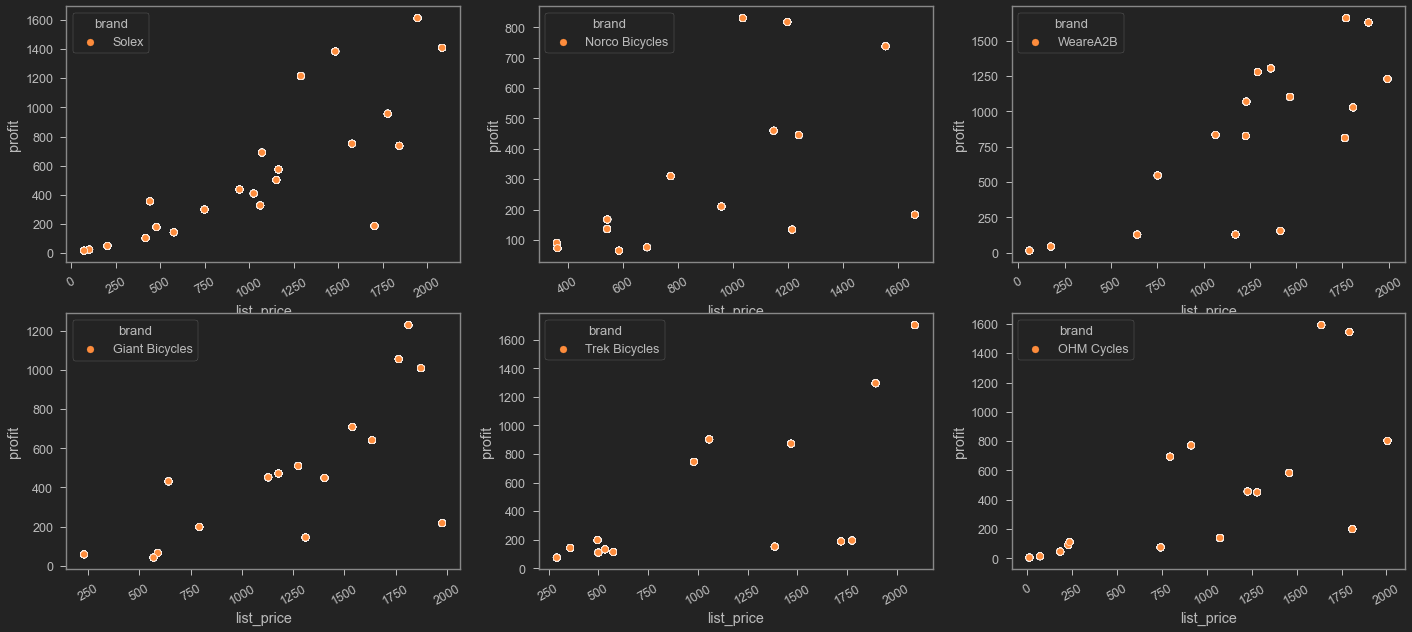

In [42]:
def sctplt(feature,feature2):
    feat = finale[finale['brand']== feature]
    sns.scatterplot(data=feat, x = 'list_price', y =feature2, hue='brand',palette='YlOrRd');
    plt.xticks(rotation=30)
    
n = 1
plt.figure(figsize=(24,16))
plt.tight_layout(True)
for i, v  in enumerate(brand_name):
    plt.subplot(3,3,n)
    sctplt(brand_name[i],'profit')
    n+=1

In [43]:
# WeareA2B = finale[finale['brand']=='WeareA2B']
# Solex = finale[finale['brand']=='Solex']

# plt.figure(figsize = (22,8))
# plt.subplot(1,2,1)
# sns.scatterplot(data=WeareA2B, x = 'list_price', y ='profit', hue='brand',palette='YlOrRd');
# plt.subplot(1,2,2)
# sns.scatterplot(data=Solex, x = 'list_price', y ='profit', hue='brand',palette='YlOrRd');

In [44]:
finale[(finale['standard_cost']>600) & (finale['brand']=='Giant Bicycles')].sample(5)

,customer_id,name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit
transaction_date,,,,,,,,,,,,,,,,,,,,,
2017-03-20,3074,Tracie Grishaev,Male,31,51.0,VP Quality Control,Health,Mass Customer,N,Yes,...,9.0,Yes,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,448.68
2017-10-01,1608,Fernande Petzolt,Female,87,61.0,Software Engineer III,Manufacturing,Mass Customer,N,Yes,...,11.0,No,Approved,Giant Bicycles,Standard,medium,large,1635.30,993.66,641.64
2017-12-11,1477,Leo Balharry,Male,42,43.0,Actuary,Financial Services,Mass Customer,N,Yes,...,3.0,No,Approved,Giant Bicycles,Touring,medium,large,1873.97,863.95,1010.02
2017-12-19,316,Genni Larway,Female,72,44.0,Environmental Specialist,Manufacturing,Mass Customer,N,Yes,...,7.0,No,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,709.34
2017-02-28,897,Pris Fance,Female,25,51.0,Account Executive,Manufacturing,Mass Customer,N,No,...,10.0,Yes,Approved,Giant Bicycles,Standard,medium,large,1635.30,993.66,641.64


In [45]:
pd.crosstab(index=[finale['brand']], columns='sales',values=finale['list_price'],aggfunc=('mean','max','min','count'))

,count,max,mean,min
col_0,sales,sales,sales,sales
brand,,,,
Giant Bicycles,3244,1977.36,1235.269547,230.91
Norco Bicycles,2862,1661.92,913.208917,360.40
OHM Cycles,2992,2005.66,980.705147,12.01
Solex,4168,2083.94,1055.213225,71.49
Trek Bicycles,2931,2091.47,1185.523374,290.62
WeareA2B,3245,1992.93,1264.303834,60.34


In [46]:
pd.crosstab(index=[finale['brand']], columns='sales (thou)',values=finale['list_price'],aggfunc=('sum'),margins=True)/1000

col_0,sales (thou),All
brand,,
Giant Bicycles,4007.21441,4007.21441
Norco Bicycles,2613.60392,2613.60392
OHM Cycles,2934.26980,2934.26980
Solex,4398.12872,4398.12872
Trek Bicycles,3474.76901,3474.76901
WeareA2B,4102.66594,4102.66594
All,21530.65180,21530.65180


In [47]:
pd.crosstab(index=[finale['brand']], columns='cost',values=finale['standard_cost'],aggfunc=('mean','max','min','count'))

,count,max,mean,min
col_0,cost,cost,cost,cost
brand,,,,
Giant Bicycles,3244,1759.85,760.187781,173.18
Norco Bicycles,2862,1479.11,615.109154,206.35
OHM Cycles,2992,1610.90,494.913977,7.21
Solex,4168,1516.13,490.019818,53.62
Trek Bicycles,2931,1580.47,568.900686,154.40
WeareA2B,3245,1259.36,426.804394,13.44


In [48]:
pd.crosstab(index=[finale['brand']], columns='profit',values=finale['profit'],aggfunc=('mean','max','min','count'))

,count,max,mean,min
col_0,profit,profit,profit,profit
brand,,,,
Giant Bicycles,3244,1230.27,475.081766,41.13
Norco Bicycles,2862,830.24,298.099762,64.51
OHM Cycles,2992,1592.19,485.791170,4.80
Solex,4168,1612.25,565.193407,17.87
Trek Bicycles,2931,1702.55,616.622689,75.48
WeareA2B,3245,1660.88,837.499439,15.08


In [49]:
pd.crosstab(index=[finale['brand']], columns=['profit (thou)','cost (thou)'],values=finale['profit'],aggfunc=('sum'))/1000

col_0,profit (thou)
col_1,cost (thou)
brand,
Giant Bicycles,1541.16525
Norco Bicycles,853.16152
OHM Cycles,1453.48718
Solex,2355.72612
Trek Bicycles,1807.32110
WeareA2B,2717.68568


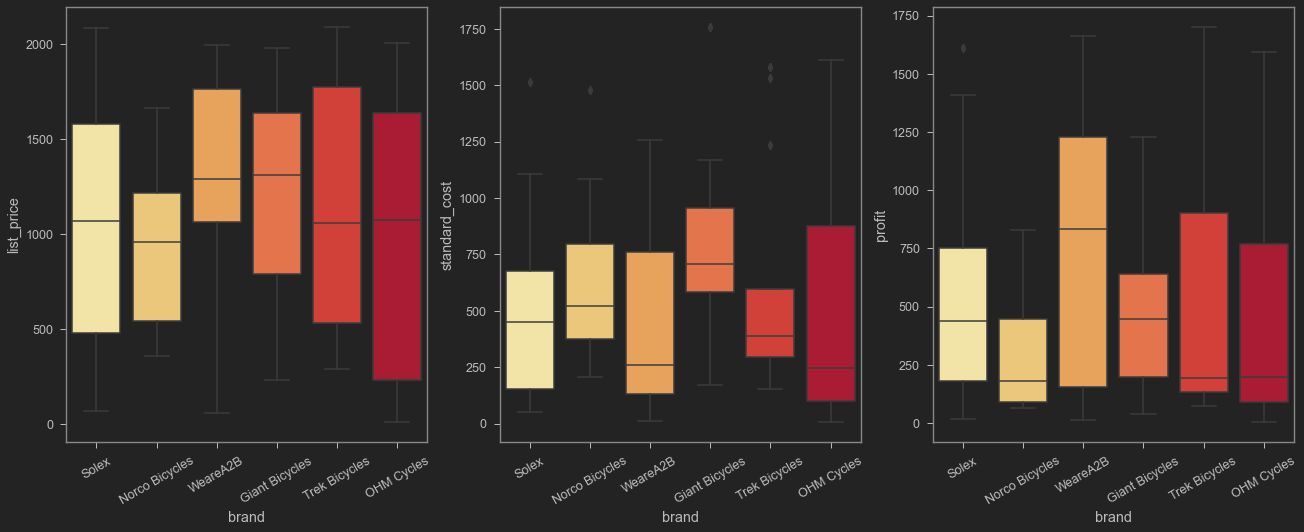

In [50]:
def bxplt(feature):
    sns.boxplot(data = finale, x = 'brand',y= feature, palette='YlOrRd')
    plt.xticks(rotation=30)

plt.figure(figsize = (22,8))
plt.subplot(1,3,1)
bxplt('list_price')

plt.subplot(1,3,2)
bxplt('standard_cost')

plt.subplot(1,3,3)
bxplt('profit')

In [51]:
finale[finale['brand'] == 'Trek Bicycles'].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,2931.0,1731.379734,1018.433336,1.00,848.50,1715.00,2618.50,3498.00
past_3_years_bike_related_purchases,2931.0,48.577277,28.678275,0.00,24.00,48.00,73.00,99.00
age,2931.0,42.321392,12.544817,18.00,33.00,43.00,52.00,88.00
list_price,2931.0,1185.523374,645.761649,290.62,533.51,1057.51,1775.81,2091.47
standard_cost,2931.0,568.900686,437.542495,154.40,297.43,388.92,598.76,1580.47
profit,2931.0,616.622689,598.449035,75.48,133.38,195.34,903.11,1702.55


- Terlihat dari data diatas bahwa Brand Solex adalah produk yang paling banyak terjual
- Jika dilihat dari list harga, rata2 penjualan brand Weare2B adalah yang paling tinggi diikuti dengan Giant Bicycles dan Trek bicycles
- Dari rata2 profit, brand Weare2B tetap yang paling tinggi namun menariknya, urutan kedua dan ketiga tertinggi itu Trek bicycles dan Solex
- Ternyata dari segi cost nya, brand Giant Bicycles merupakan yang paling tinggi. Hal ini menjawab mengapa rata-rata profit nya tidak setinggi salesnya
- Dari Box plot, kita bisa lihat ada beberapa outliers di standard cost, terutama di brand Trek Bicycles. Tapi karena outliers cost masih dibawah price maka saya akan abaikan outliers disini

- **Brand Name, Product Line, Class, dan Size Vs Price & profit**

In [52]:
pd.crosstab(index=[finale['brand'],finale['product_line']], columns='Price',values=finale['list_price'],aggfunc=('mean','max','min','count'))

count      max         mean      min
col_0                       Price    Price        Price    Price
brand          product_line                                     
Giant Bicycles Road           570  1538.99   953.705035   590.26
               Standard      2498  1977.36  1254.517142   230.91
               Touring        176  1873.97  1873.970000  1873.97
Norco Bicycles Mountain       196   688.63   688.630000   688.63
               Road           910  1240.31   817.641758   543.39
               Standard      1756  1661.92   987.800934   360.40
OHM Cycles     Road           766  1810.00   964.994922    12.01
               Standard      2000  2005.66   976.284935    71.16
               Touring        226  1073.07  1073.070000  1073.07
Solex          Road           523  1777.80  1327.975258   416.98
               Standard      3445  1945.43   954.081179    71.49
               Touring        200  2083.94  2083.940000  2083.94
Trek Bicycles  Mountain       222   574.64   574.640000   574.64
               Road           970  1894.19  1097.139485   290.62
               Standard      1739  2091.47  1312.808298   358.39
WeareA2B       Road           153  1172.78  1172.780000  1172.78
               Standard      2481  1992.93  1188.894796    60.34
               Touring        611  1890.39  1593.424894  1362.99

In [53]:
pd.crosstab(index=[finale['brand'],finale['product_line']], columns='profit',values=finale['profit'],aggfunc=('mean','max','min','count'))

count      max         mean      min
col_0                       profit   profit       profit   profit
brand          product_line                                      
Giant Bicycles Road            570   709.34   310.245123    64.93
               Standard       2498  1230.27   475.004808    41.13
               Touring         176  1010.02  1010.020000  1010.02
Norco Bicycles Mountain        196    75.75    75.750000    75.75
               Road            910   830.24   337.462231   135.85
               Standard       1756   817.36   302.519300    64.51
OHM Cycles     Road            766   450.77   182.307415     4.80
               Standard       2000  1592.19   641.186860    14.23
               Touring         226   139.23   139.230000   139.23
Solex          Road            523   957.02   424.885832   104.24
               Standard       3445  1612.25   537.511997    17.87
               Touring         200  1408.91  1408.910000  1408.91
Trek Bicycles  Mountain        222   114.93   114.930000   114.93
               Road            970  1295.43   524.749928    75.48
               Standard       1739  1702.55   731.914439   110.81
WeareA2B       Road            153   129.01   129.010000   129.01
               Standard       2481  1660.88   751.161451    15.08
               Touring         611  1630.25  1365.491964  1103.43

In [54]:
pd.crosstab(index=[finale['product_line']], columns='Price',values=finale['list_price'],aggfunc=('mean','max','min','count'))

,count,max,mean,min
col_0,Price,Price,Price,Price
product_line,,,,
Mountain,418,688.63,628.089856,574.64
Road,3892,1894.19,1018.767646,12.01
Standard,13919,2091.47,1102.116776,60.34
Touring,1213,2083.94,1618.057007,1073.07


In [55]:
pd.crosstab(index=[finale['product_line']], columns='cost',values=finale['standard_cost'],aggfunc=('mean','max','min','count'))

,count,max,mean,min
col_0,cost,cost,cost,cost
product_line,,,,
Mountain,418,612.88,531.531340,459.71
Road,3892,1610.90,665.597276,7.21
Standard,13919,1759.85,528.202040,13.44
Touring,1213,933.84,525.454295,57.74


In [56]:
pd.crosstab(index=[finale['product_line']], columns='profit',values=finale['profit'],aggfunc=('mean','max','min','count'))

,count,max,mean,min
col_0,profit,profit,profit,profit
product_line,,,,
Mountain,418,114.93,96.558517,75.75
Road,3892,1295.43,353.170370,4.80
Standard,13919,1702.55,573.914737,14.23
Touring,1213,1630.25,1092.602712,139.23


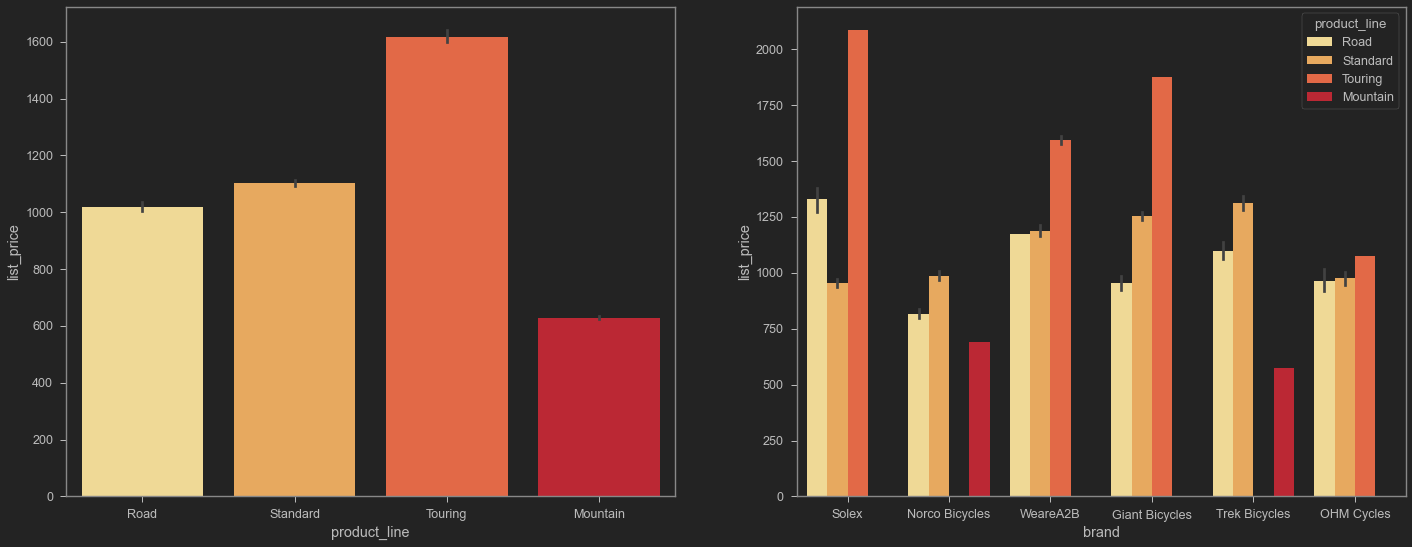

In [57]:
plt.figure(figsize=(24,9))

plt.subplot(1,2,1)
sns.barplot(x='product_line',y='list_price',data=finale, palette='YlOrRd');
plt.subplot(1,2,2)
sns.barplot(x='brand',y='list_price',data=finale, hue='product_line',palette='YlOrRd');
plt.show()

> - Berdasarkan data diatas, jenis sepeda touring adalah jenis sepeda yang paling mahal, dilihat dari per brand pun memang jenis sepeda ini golongan sepeda yang paling mahal.  
> - Sedangkan Jenis Sepeda yang paling populer adalah jenis Sepeda standard yang rata2 harga sepedanya sedikit lebih mahal dibanding sepeda tipe Road.  


#### Melihat product class dari setiap tipe/jenis sepeda

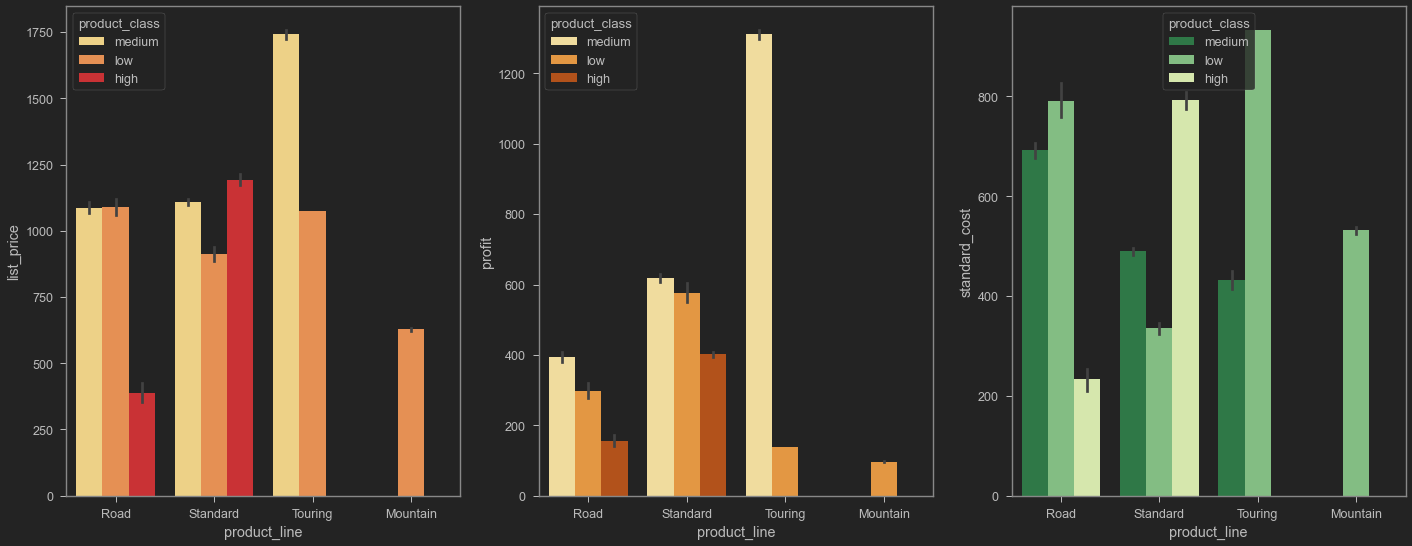

In [58]:
plt.figure(figsize=(24,9))

plt.subplot(1,3,1)
# sns.barplot(x='brand',y='list_price',data=finale, hue='product_class',palette='YlOrRd');

# plt.subplot(3,2,2)
sns.barplot(x='product_line',y='list_price',data=finale, hue='product_class',palette='YlOrRd');

plt.subplot(1,3,2)
# sns.barplot(x='brand',y='profit',data=finale, hue='product_class',palette='YlOrBr');

# plt.subplot(3,2,4)
sns.barplot(x='product_line',y='profit',data=finale, hue='product_class',palette='YlOrBr');

plt.subplot(1,3,3)
# sns.barplot(x='brand',y='standard_cost',data=finale, hue='product_class',palette='YlGn_r');

# plt.subplot(3,2,6)
sns.barplot(x='product_line',y='standard_cost',data=finale, hue='product_class',palette='YlGn_r');

plt.show()

In [59]:
pd.crosstab(index=[finale['product_line'],finale['product_class']], columns='price',values=finale['list_price'],aggfunc=('mean','max','min','count'))

count      max         mean      min
col_0                      price    price        price    price
product_line product_class                                     
Mountain     low             418   688.63   628.089856   574.64
Road         high            381   774.53   388.266588    12.01
             low             709  1720.70  1089.583526   590.26
             medium         2802  1894.19  1086.580796   290.62
Standard     high           2571  2005.66  1193.739199   227.88
             low            1553  1793.43   911.699813    71.16
             medium         9795  2091.47  1108.258307    60.34
Touring      low             226  1073.07  1073.070000  1073.07
             medium          987  2083.94  1742.846332  1362.99

In [60]:
pd.crosstab(index=[finale['product_line'],finale['product_class']], columns='cost',values=finale['standard_cost'],aggfunc=('mean','max','min','count'))

count      max        mean     min
col_0                       cost     cost        cost    cost
product_line product_class                                   
Mountain     low             418   612.88  531.531340  459.71
Road         high            381   464.72  232.962966    7.21
             low             709  1531.42  791.527546  234.43
             medium         2802  1610.90  692.559843  206.35
Standard     high           2571  1759.85  792.140572  136.73
             low            1553   748.90  335.176079   56.93
             medium         9795  1580.47  489.527548   13.44
Touring      low             226   933.84  933.840000  933.84
             medium          987   863.95  431.943485   57.74

In [61]:
pd.crosstab(index=[finale['product_line'],finale['product_class']], columns='profit',values=finale['profit'],aggfunc=('mean','max','min','count'))

count      max         mean      min
col_0                      profit   profit       profit   profit
product_line product_class                                      
Mountain     low              418   114.93    96.558517    75.75
Road         high             381   309.81   155.303622     4.80
             low              709   745.94   298.055980    64.93
             medium          2802  1295.43   394.020953    75.14
Standard     high            2571   802.26   401.598627    91.15
             low             1553  1544.61   576.523735    14.23
             medium          9795  1702.55   618.730760    15.08
Touring      low              226   139.23   139.230000   139.23
             medium           987  1630.25  1310.902847  1010.02

- Terdapat kejanggalan jika melihat product class dari tipe sepeda Road, class high, maximum list price nya paling rendah dibandingkan medium bahkan low. Jika dilihat list price sepertinya input data nya terbalik-balik. high seharusnya low, low seharusnya medium dan medium seharusnya high. 
- Maka saya memutuskan untuk merubah data tsb

##### Merubah urutan high medium low class di product line

In [62]:

finale[(final['product_line']=='Road') & (finale['product_class']=='high')] = finale[(final['product_line']=='Road') & (finale['product_class']=='high')].replace('high','low1')

In [63]:
finale[(final['product_line']=='Road') & (finale['product_class']=='low1')]['product_class'].count()

381

In [64]:
finale[(final['product_line']=='Road') & (finale['product_class']=='low')] = finale[(final['product_line']=='Road') & (finale['product_class']=='low')].replace('low','high1')

In [65]:
finale[(final['product_line']=='Road') & (finale['product_class']=='high1')]['product_class'].count()

709

In [66]:
finale[(final['product_line']=='Road') & (finale['product_class']=='low1')] = finale[(final['product_line']=='Road') & (finale['product_class']=='low1')].replace('low1', 'low')
finale[(final['product_line']=='Road') & (finale['product_class']=='high1')] = finale[(final['product_line']=='Road') & (finale['product_class']=='high1')].replace('high1', 'high')

In [67]:
pd.crosstab(index=[finale['product_line'],finale['product_class']], columns='price',values=finale['list_price'],aggfunc=('mean','max','min','count'))

count      max         mean      min
col_0                      price    price        price    price
product_line product_class                                     
Mountain     low             418   688.63   628.089856   574.64
Road         high            709  1720.70  1089.583526   590.26
             low             381   774.53   388.266588    12.01
             medium         2802  1894.19  1086.580796   290.62
Standard     high           2571  2005.66  1193.739199   227.88
             low            1553  1793.43   911.699813    71.16
             medium         9795  2091.47  1108.258307    60.34
Touring      low             226  1073.07  1073.070000  1073.07
             medium          987  2083.94  1742.846332  1362.99

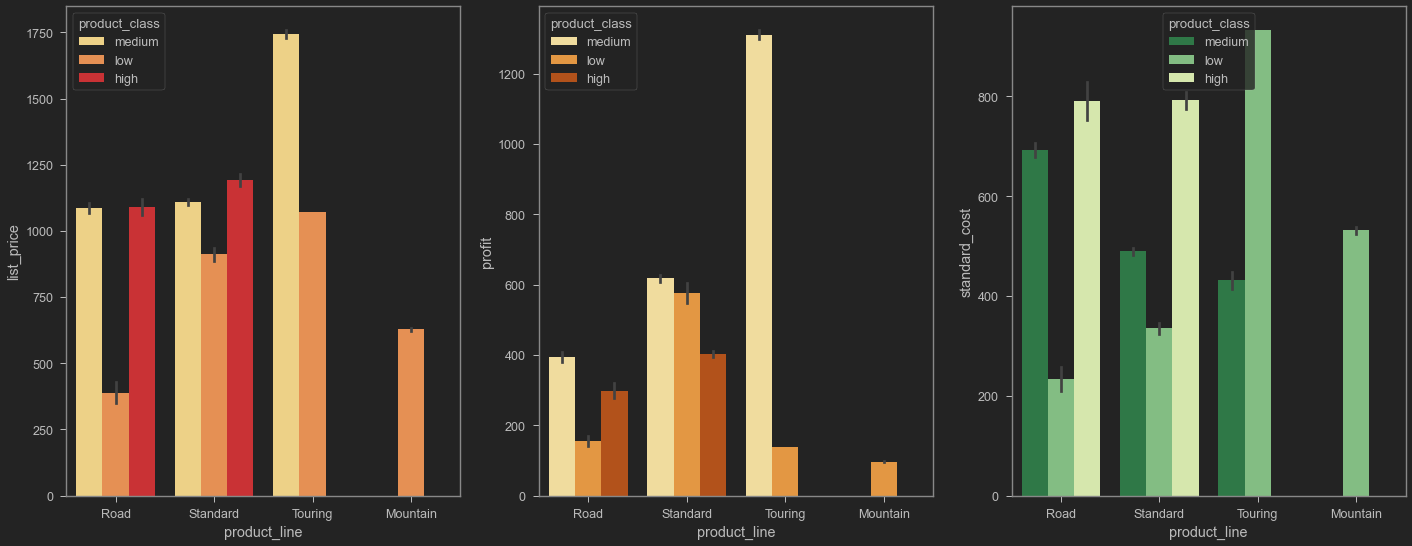

In [68]:
plt.figure(figsize=(24,9))

plt.subplot(1,3,1)
# sns.barplot(x='brand',y='list_price',data=finale, hue='product_class',palette='YlOrRd');

# plt.subplot(3,2,2)
sns.barplot(x='product_line',y='list_price',data=finale, hue='product_class',palette='YlOrRd');

plt.subplot(1,3,2)
# sns.barplot(x='brand',y='profit',data=finale, hue='product_class',palette='YlOrBr');

# plt.subplot(3,2,4)
sns.barplot(x='product_line',y='profit',data=finale, hue='product_class',palette='YlOrBr');

plt.subplot(1,3,3)
# sns.barplot(x='brand',y='standard_cost',data=finale, hue='product_class',palette='YlGn_r');

# plt.subplot(3,2,6)
sns.barplot(x='product_line',y='standard_cost',data=finale, hue='product_class',palette='YlGn_r');

plt.show()

- Jika kita abaikan tipe jenis road, product class mempengaruhi juga besar kecilnya harga. Terlihat dari tipe Standard dan juga Touring, semakin tinggi kelasnya maka semakin tinggi harganya.
- Dari segi cost ternyata hasilnya hampir sama kecuali di tipe road, ada perbedaan sedikit dimana cost kelas yang high sedikit lebih kecil dibanding yang medium

In [69]:
pd.crosstab(index=[finale['brand'],finale['product_line'],finale['product_class'],finale['product_size']], columns='cost',values=finale['standard_cost'],aggfunc=('mean','max','min','count'))

count      max  \
col_0                                                   cost     cost   
brand          product_line product_class product_size                  
Giant Bicycles Road         high          small          192   525.33   
                            medium        medium         378   829.65   
               Standard     high          medium         578   764.96   
                                          small          189  1759.85   
                            medium        large          748   993.66   
                                          medium         789   954.82   
                                          small          194  1167.18   
               Touring      medium        large          176   863.95   
Norco Bicycles Mountain     low           small          196   612.88   
               Road         low           large          188   464.72   
                            medium        large          217   795.10   
                                          medium         505   407.54   
               Standard     high          medium         190   689.18   
                                          small          180  1479.11   
                            low           medium         421   748.90   
                            medium        medium         591   818.01   
                                          small          374  1082.36   
OHM Cycles     Road         low           large          193     7.21   
                            medium        medium         377   829.51   
                                          small          196  1610.90   
               Standard     high          medium         561  1203.40   
                            low           medium         373   248.82   
                            medium        medium        1066   770.89   
               Touring      low           medium         226   933.84   
Solex          Road         medium        large          179   820.78   
                                          medium         163   312.74   
                                          small          181  1516.13   
               Standard     high          large          187  1105.75   
                                          medium         368   614.80   
                            low           medium         400   507.58   
                            medium        large          501   733.58   
                                          medium        1989   826.51   
               Touring      medium        large          200   675.03   
Trek Bicycles  Mountain     low           medium         222   459.71   
               Road         high          medium         198   234.43   
                                          small          166  1531.42   
                            medium        large          223   598.76   
                                          medium         383   400.13   
               Standard     high          medium         318   297.43   
                            low           medium         187   154.40   
                            medium        large          665   596.55   
                                          medium         200   388.72   
                                          small          369  1580.47   
WeareA2B       Road         high          small          153  1043.77   
               Standard     low           medium         172   513.85   
                            medium        medium        1921   950.52   
                                          small          388  1259.36   
               Touring      medium        large          423   260.14   
                                          medium         188   363.25   

                                                               mean      min  
col_0                                                          cost     cost  
brand          product_line product_class product_size                        
Giant Bicycles Road  

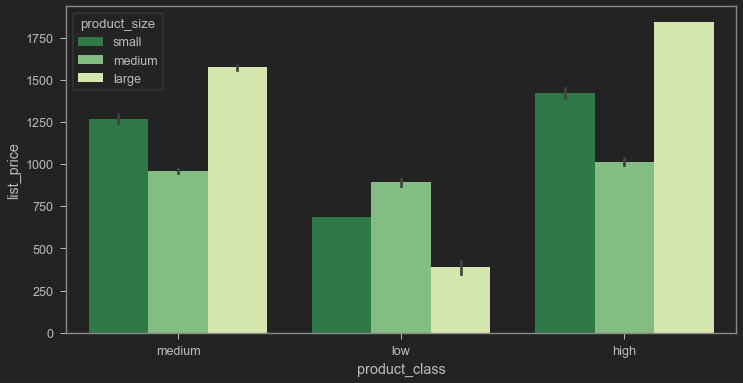

In [70]:
plt.figure(figsize=(12,6))
sns.barplot(x='product_class',y='list_price',data=finale, hue='product_size',palette='YlGn_r');

>Di product size terdapat kategori high, yang mana agak tidak lazim. Namun, setelah ditelaah ternyata di setiap brand, product line Road dan kelasnya high, didapati kategori ini yang ternyata pricenya paling kecil dibanding 3 kategori lain. Maka saya menyimpulkan bahwa ini kategori terendah di product size.  
Dari product class kurang begitu jelas polanya terhadap price, karena setiap brand dan tipe nya memberikan pola yang berbeda beda.Sehingga saya berasumsi bahwa product size tidak berpengaruh terhadap price

#### Melihat Penjualan Brand berdasarkan timeframe

In [71]:
finals = finale.copy().reset_index()

In [72]:
finals.head()

,transaction_date,customer_id,name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,...,property_valuation,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit
0,2017-07-01,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,...,8.0,Yes,Approved,Solex,Road,medium,small,1703.52,1516.13,187.39
1,2017-08-22,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,...,8.0,No,Approved,Norco Bicycles,Standard,low,medium,958.74,748.90,209.84
2,2017-04-07,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,...,8.0,No,Approved,Solex,Touring,medium,large,2083.94,675.03,1408.91
3,2017-02-13,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,...,8.0,No,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,1069.55
4,2017-06-25,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,...,8.0,Yes,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,217.51


In [73]:
trans_dt = finals['transaction_date'].dt

In [74]:
finals['month'] = trans_dt.month_name()

In [75]:
finals['quarter'] = trans_dt.to_period('Q')

In [76]:
finals['day'] = trans_dt.day_name()

In [77]:
finals.head()

,transaction_date,customer_id,name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,profit,month,quarter,day
0,2017-07-01,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,...,Solex,Road,medium,small,1703.52,1516.13,187.39,July,2017Q3,Saturday
1,2017-08-22,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,...,Norco Bicycles,Standard,low,medium,958.74,748.90,209.84,August,2017Q3,Tuesday
2,2017-04-07,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,...,Solex,Touring,medium,large,2083.94,675.03,1408.91,April,2017Q2,Friday
3,2017-02-13,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,...,WeareA2B,Standard,medium,medium,1231.15,161.60,1069.55,February,2017Q1,Monday
4,2017-06-25,34,Jephthah Bachmann,Male,59,43.0,Legal Assistant,IT,Affluent Customer,N,...,Giant Bicycles,Standard,high,small,1977.36,1759.85,217.51,June,2017Q2,Sunday


In [78]:
finals['day'] = pd.Categorical(finals['day'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

In [79]:
finals['month'] = pd.Categorical(finals['month'], categories=
    ['January','February','March','April','May','June', 'July','August','September','October','November','December'],
    ordered=True)

In [80]:
finals_by_day = pd.crosstab(index=finals['brand'], columns=finals['day'],values=finals['list_price'],aggfunc='median')
finals_by_day
# pd.crosstab(index=finals['day'], columns=finals['brand'], values=finals['list_price'], aggfunc='sum').sort_index()

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
brand,,,,,,,
Giant Bicycles,1274.93,1311.44,1311.44,1311.44,1311.44,1311.440,1311.44
Norco Bicycles,774.53,958.74,958.74,958.74,774.53,958.740,958.74
OHM Cycles,1073.07,912.52,1073.07,1073.07,1073.07,912.520,1073.07
Solex,1071.23,1061.56,1061.56,1061.56,1061.56,1111.595,1061.56
Trek Bicycles,1057.51,1057.51,1057.51,1057.51,1057.51,1386.840,1057.51
WeareA2B,1362.99,1292.84,1292.84,1362.99,1292.84,1362.990,1292.84


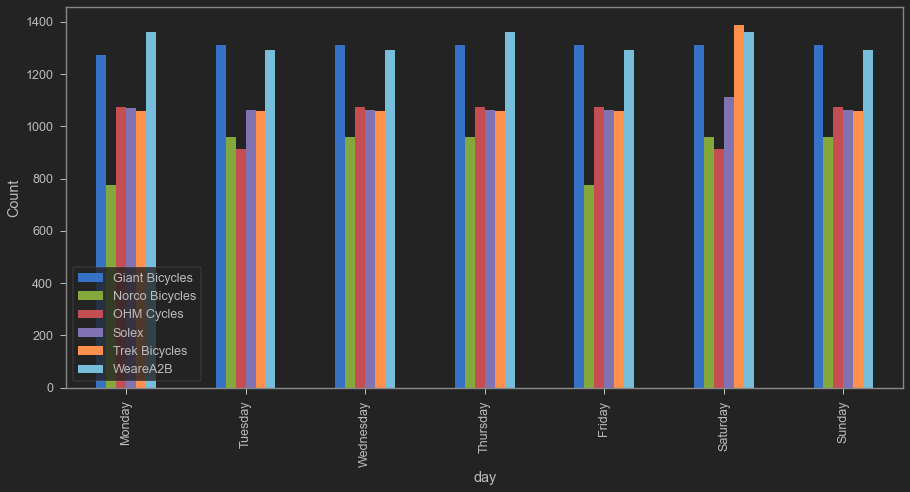

In [81]:
finals_by_day.T.plot(kind='bar',figsize=(15,7),legend=());
plt.ylabel('Count')
plt.legend(loc='lower left')
plt.show()

In [82]:
finals_by_month = pd.crosstab(index=finals['brand'], columns=finals['month'])
finals_by_month

month,January,February,March,April,May,June,July,August,September,October,November,December
brand,,,,,,,,,,,,
Giant Bicycles,275,260,235,258,297,255,273,292,242,276,283,298
Norco Bicycles,240,234,250,259,238,223,230,230,211,263,225,259
OHM Cycles,257,221,261,249,226,249,280,275,231,250,256,237
Solex,359,335,347,349,337,327,359,372,347,360,371,305
Trek Bicycles,224,255,241,237,279,238,273,248,231,274,206,225
WeareA2B,277,273,263,261,264,245,255,286,272,299,266,284


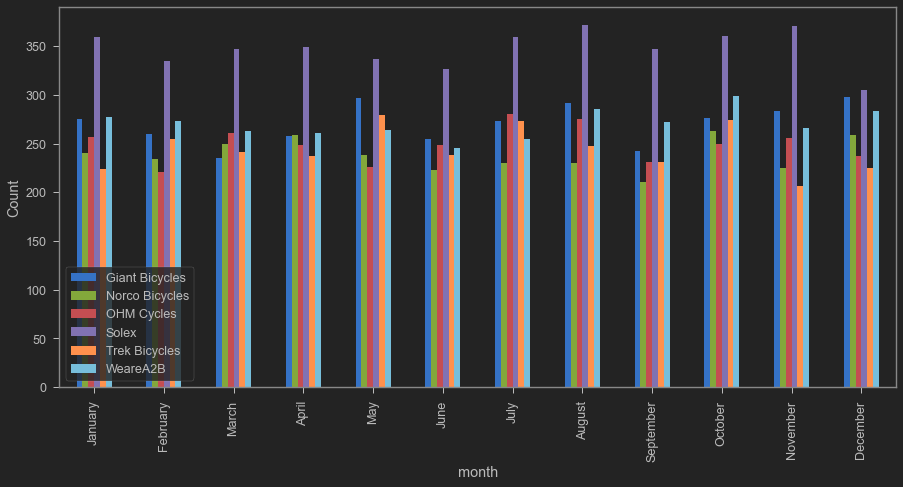

In [83]:
finals_by_month.T.plot(kind='bar',figsize=(15,7),legend=());
plt.ylabel('Count')
plt.legend(loc='lower left')
plt.show()

In [84]:
finals_by_quarter = pd.crosstab(index=finals['brand'], columns=finals['quarter'])
finals_by_quarter.T

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
quarter,,,,,,
2017Q1,770,724,739,1041,720,813
2017Q2,810,720,724,1013,754,770
2017Q3,807,671,786,1078,752,813
2017Q4,857,747,743,1036,705,849


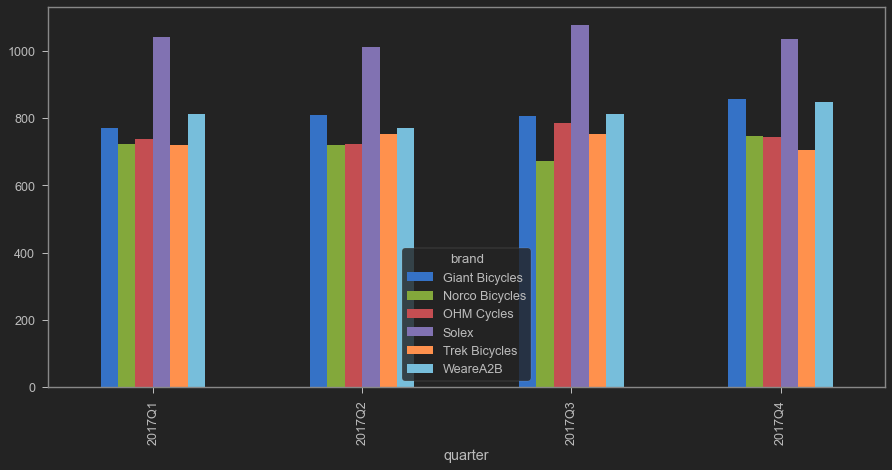

In [85]:
finals_by_quarter.T.plot(kind='bar',figsize=(15,7));
plt.show()

> Setelah di crrosstab dengan hari, bulan dan kuartal, tidak ada perbedaan yang signifikan atau tidak adanya pola yang terbentuk. Penjualan tidak fluktuatif dilihat dari Hari, Bulan dan musim tidak menjadi pengaruh dalam penjualan.

### Melihat Penjualan berdasarkan Demografi Customer

In [86]:
finale.loc[:,'name':'online_order'].sample(5)

,name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,state,country,property_valuation,online_order
transaction_date,,,,,,,,,,,,,,
2017-01-03,Grove Peltzer,Male,48,32.0,Registered Nurse,Health,Mass Customer,N,Yes,55 Daystar Court,NSW,Australia,10.0,Yes
2017-07-09,Claire Trahar,Female,18,48.0,Technical Writer,Financial Services,Mass Customer,N,No,11 Hermina Junction,VIC,Australia,3.0,No
2017-05-16,Marty Wiggall,Female,27,47.0,VP Accounting,Financial Services,Mass Customer,N,Yes,305 Vera Lane,NSW,Australia,8.0,No
2017-04-29,Bendix Olivella,Male,48,43.0,Legal Assistant,Manufacturing,Affluent Customer,N,No,95465 Union Plaza,QLD,Australia,7.0,Yes
2017-11-15,Denys Dumingos,Female,87,30.0,Administrative Assistant II,Financial Services,Mass Customer,N,Yes,515 Warrior Pass,QLD,Australia,9.0,Yes


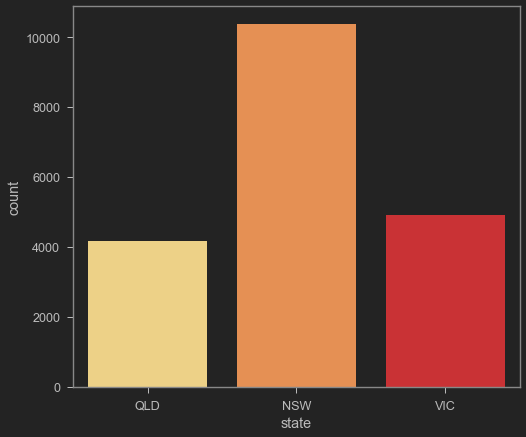

In [87]:
sns.countplot(data = finale, x = 'state', palette='YlOrRd');

Penjualan terbanyak terletak di New South Wales diikuti Victoria dan Queensland  


- Melihat data dari state

In [88]:
(pd.crosstab(index=[finale['brand']], columns=finale['state'],normalize='columns',margins=True)*100).round(2).T

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
state,,,,,,
NSW,16.33,15.01,15.80,21.23,14.97,16.67
QLD,17.05,14.94,15.30,21.27,14.56,16.88
VIC,17.14,13.92,14.61,22.03,15.75,16.56
All,16.69,14.72,15.39,21.44,15.08,16.69


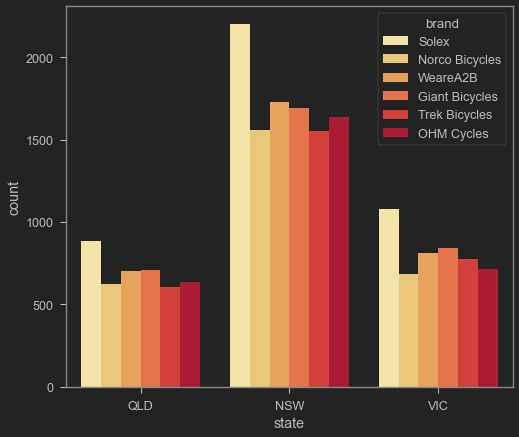

In [89]:
sns.countplot(data = finale, x = 'state', hue='brand',palette='YlOrRd');

In [115]:
pd.crosstab(index=[finale['brand'],finale['product_line']], columns=finale['state'],margins=True)

state                          NSW   QLD   VIC    All
brand          product_line                          
Giant Bicycles Road            289   128   153    570
               Standard       1314   542   642   2498
               Touring          89    41    46    176
Norco Bicycles Mountain        109    37    50    196
               Road            473   206   231    910
               Standard        974   380   402   1756
OHM Cycles     Road            424   170   172    766
               Standard       1085   423   492   2000
               Touring         128    45    53    226
Solex          Road            267   116   140    523
               Standard       1820   726   899   3445
               Touring         113    45    42    200
Trek Bicycles  Mountain        108    45    69    222
               Road            502   202   266    970
               Standard        941   360   438   1739
WeareA2B       Road             71    32    50    153
               Standard       1345   532   604   2481
               Touring         312   140   159    611
All                          10364  4170  4908  19442

- Solex merupakan Brand paling populer di tiap state, di posisi kedua dan ketiga nampak WeareA2B bergantian.
- Sepeda tipe Standard merupakan tipe yang paling diminati.
- Tipe selanjutnya yang paling diminati adalah tipe Road, terjual paling banyak dari brand Trek Bicycles, untuk Tipe Touring, brand WeareA2B paling diminati.  



#### Melihat data dari kategori umur

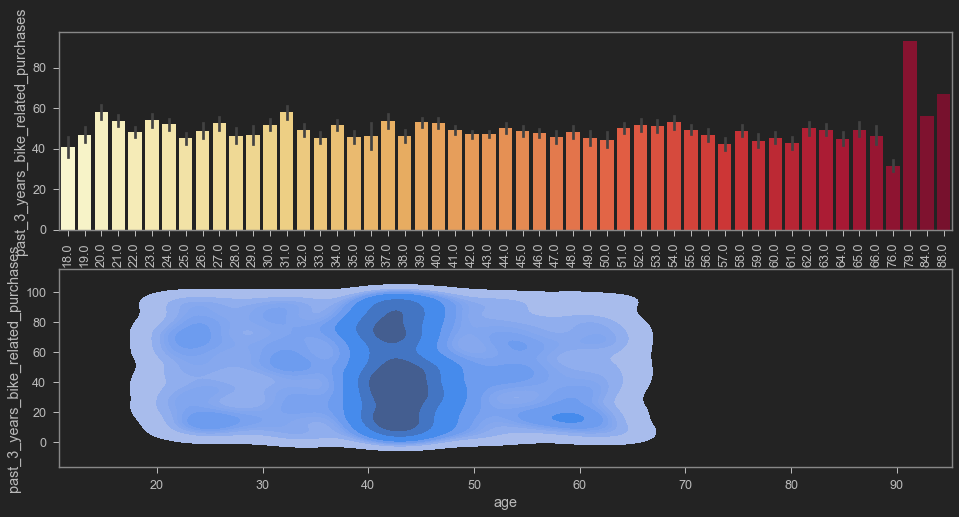

In [150]:
plt.figure(figsize=(16,8))

plt.subplot(2,1,1)
sns.barplot(x='age',y='past_3_years_bike_related_purchases',data=finale, palette='YlOrRd');
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.kdeplot(x=finals['age'],y=finals['past_3_years_bike_related_purchases'],fill=True);

plt.show()

In [117]:
# Mengklompokkan umur per 10 tahun
age_18_29 = finale[(finale['age']>17) & (finale['age']<30)]
age_30_39 = finale[(finale['age']>29) & (finale['age']<40)]
age_40_49 = finale[(finale['age']>39) & (finale['age']<50)]
age_50_59 = finale[(finale['age']>49) & (finale['age']<60)]
age60abv= finale[(finale['age']>59)]

In [132]:
print(f'age_18_29: {age_18_29.age.count()}')
print(f'age_30_39: {age_30_39.age.count()}')
print(f'age_40_49: {age_40_49.age.count()}')
print(f'age_50_59: {age_50_59.age.count()}')
print(f'age 60 above: {age60abv.age.count()}')

age_18_29: 3554
age_30_39: 3631
age_40_49: 6735
age_50_59: 3308
age 60 above: 2214


>- The customer of the company mostly from age range 40-49, scorching to 2 times more than other age range group.  


#### Melihat Data dari Job Category dan Wealth Segment

In [169]:
w_seg = (finale['wealth_segment'].value_counts(normalize=True) * 100 ).round(2)

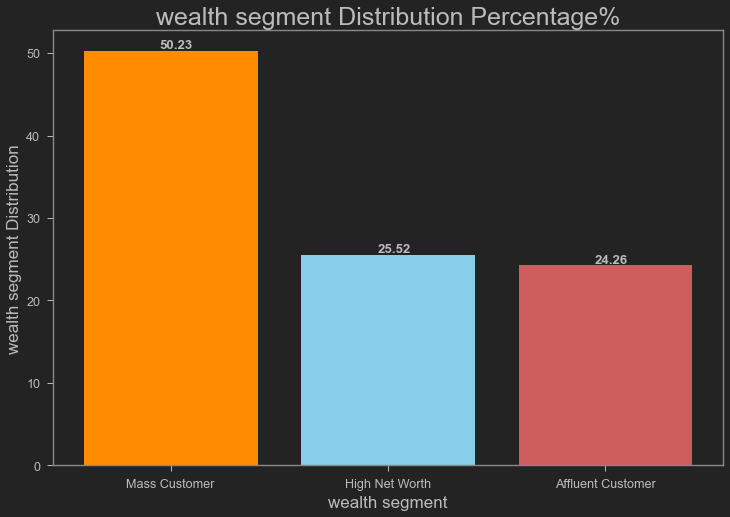

In [180]:
x = w_seg.index
y = w_seg.values
plt.figure(figsize=(12,8))  
plt.bar(x, y,color=['darkorange','skyblue','indianred']);
plt.xlabel('wealth segment',fontdict={'fontsize': 17})
plt.ylabel('wealth segment Distribution',fontdict={'fontsize': 17}) 
plt.title('wealth segment Distribution Percentage%', fontdict={'fontsize': 25})
for i, v in enumerate(y):   # Untuk Menampilkan angka persentasenya
    plt.text(i-0.05,v+0.3,v,fontweight='bold')
plt.show()

In [185]:
pd.crosstab(index=[finale['state']], columns=finale['wealth_segment'],margins=True)

wealth_segment,Affluent Customer,High Net Worth,Mass Customer,All
state,,,,
NSW,2504,2685,5175,10364
QLD,1016,1063,2091,4170
VIC,1196,1213,2499,4908
All,4716,4961,9765,19442


In [183]:
pd.crosstab(index=[finale['state']], columns=finale['wealth_segment'],margins=True,values=finale['list_price'], aggfunc='mean')

wealth_segment,Affluent Customer,High Net Worth,Mass Customer,All
state,,,,
NSW,1085.766721,1100.600838,1108.626570,1101.024278
QLD,1178.946486,1083.190442,1106.560775,1118.239724
VIC,1106.078344,1128.081245,1106.580344,1111.771909
All,1110.992197,1103.589446,1107.660559,1107.429884


In [189]:
pd.crosstab(index=[finale['brand']], columns=finale['wealth_segment'],margins=True,values=finale['list_price'], aggfunc='mean')

wealth_segment,Affluent Customer,High Net Worth,Mass Customer,All
brand,,,,
Giant Bicycles,1247.442010,1230.803948,1231.431593,1235.269547
Norco Bicycles,913.653947,894.392155,922.821445,913.208917
OHM Cycles,970.528502,965.751484,993.037305,980.705147
Solex,1061.799209,1067.726323,1045.726153,1055.213225
Trek Bicycles,1203.749453,1195.356879,1171.304527,1185.523374
WeareA2B,1242.571669,1254.200290,1279.357619,1264.303834
All,1110.992197,1103.589446,1107.660559,1107.429884


In [188]:
pd.crosstab(index=[finale['state'],finale['brand']], columns=finale['wealth_segment'],margins=True,values=finale['profit'], aggfunc='mean')

wealth_segment        Affluent Customer  High Net Worth  Mass Customer  \
state brand                                                              
NSW   Giant Bicycles         462.461881      473.655067     463.665925   
      Norco Bicycles         259.586841      295.795911     300.137727   
      OHM Cycles             447.620670      491.770648     472.427195   
      Solex                  547.903384      583.223789     565.794623   
      Trek Bicycles          631.591439      657.674529     631.838797   
      WeareA2B               798.019221      844.174941     842.075973   
QLD   Giant Bicycles         538.439158      493.710933     471.418110   
      Norco Bicycles         354.032074      251.827544     314.468612   
      OHM Cycles             505.245229      517.517986     500.058121   
      Solex                  627.103271      520.483496     526.784564   
      Trek Bicycles          693.553856      554.208690     559.803074   
      WeareA2B               844.686082      785.034762     887.282093   
VIC   Giant Bicycles         459.377164      449.332163     496.857407   
      Norco Bicycles         364.561429      296.868272     290.736472   
      OHM Cycles             524.370757      469.312235     504.738177   
      Solex                  582.894498      612.629962     556.178273   
      Trek Bicycles          601.607612      611.152062     578.381085   
      WeareA2B               831.682905      843.517512     838.957770   
All                          555.323539      550.905680     550.598869   

wealth_segment               All  
state brand                       
NSW   Giant Bicycles  466.023735  
      Norco Bicycles  289.952410  
      OHM Cycles      471.424960  
      Solex           566.008332  
      Trek Bicycles   638.138794  
      WeareA2B        832.111007  
QLD   Giant Bicycles  495.379451  
      Norco Bicycles  305.848138  
      OHM Cycles      505.106003  
      Solex           549.382266  
      Trek Bicycles   592.179819  
      WeareA2B        849.485696  
VIC   Giant Bicycles  476.145422  
      Norco Bicycles  309.593236  
      OHM Cycles      501.404310  
      Solex           576.508529  
      Trek Bicycles   592.645123  
      WeareA2B        838.573100  
All                   551.823210

- As we can see Mass Customer is half the population of the customer.
- Wealth segment from each state shown us that High Net Worth average purchase price is higher in Victoria(Vic), Affluent Customer in Queensland(QLD) and Mass Customer from New South Wales (NSW).
- If we take a look into each state and brand that purchased based on wealth segment, in all 3 states, WeareA2B is the most highest average profit brand among others coming from both 3 wealth segments.
- It means, WeareA2B brand even though their average price is higher than the other brands, customer from all wealth segments class and states willing to buy their product

#### Job industry category

In [200]:
Jo_Indus = (finale['job_industry_category'].value_counts(normalize=True) * 100 ).round(2)

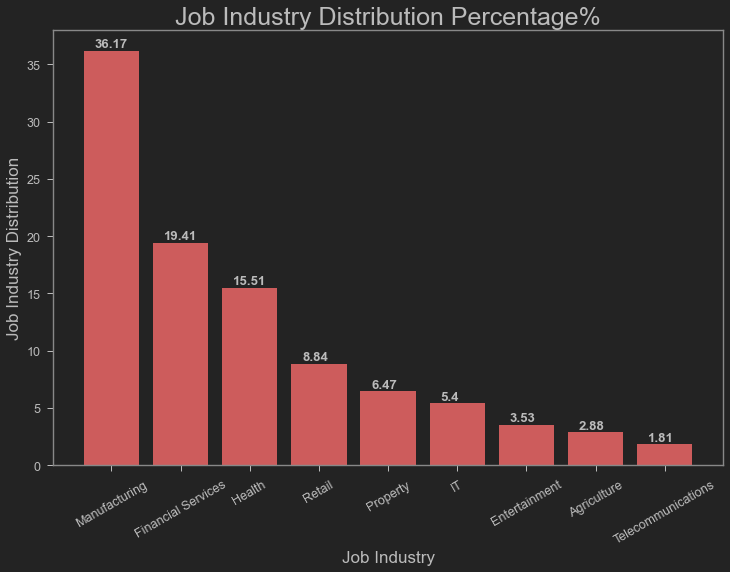

In [206]:
x = Jo_Indus.index
y = Jo_Indus.values
plt.figure(figsize=(12,8))  
plt.bar(x, y,color='indianred');
plt.xlabel('Job Industry',fontdict={'fontsize': 17})
plt.ylabel('Job Industry Distribution',fontdict={'fontsize': 17}) 
plt.title('Job Industry Distribution Percentage%', fontdict={'fontsize': 25})
for i, v in enumerate(y):   # Untuk Menampilkan angka persentasenya
    plt.text(i-0.24,v+0.3,v,fontweight='bold')
plt.xticks(rotation=30)
plt.show()

In [195]:
pd.crosstab(index=[finale['job_industry_category']], columns=finale['brand'],margins=True)

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,All
job_industry_category,,,,,,,
Agriculture,96,78,79,130,86,90,559
Entertainment,124,107,95,136,104,120,686
Financial Services,633,554,598,763,589,636,3773
Health,472,488,437,661,457,501,3016
IT,168,162,154,219,159,187,1049
Manufacturing,1189,992,1093,1545,1052,1161,7032
Property,210,177,208,271,177,215,1258
Retail,284,256,271,366,266,275,1718
Telecommunications,68,48,57,77,41,60,351


In [199]:
pd.crosstab(index=[finale['job_industry_category']], columns=finale['brand'],margins=True,values=finale['list_price'], aggfunc='mean')

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,All
job_industry_category,,,,,,,
Agriculture,1199.563437,876.546282,1007.782532,1040.455846,1056.686744,1228.372333,1073.043560
Entertainment,1248.754032,949.599159,1067.743368,1046.653824,1120.792404,1274.729083,1122.103571
Financial Services,1265.528515,896.878845,990.991003,1049.348663,1176.790017,1285.304292,1113.649332
Health,1196.426758,881.571619,955.539199,1095.965219,1202.812910,1277.135908,1102.935879
IT,1270.130536,928.282901,905.259870,1081.429543,1249.342516,1309.731283,1128.286044
Manufacturing,1233.930908,918.155212,988.303028,1038.037100,1179.499591,1248.995134,1102.510420
Property,1231.490524,954.510791,921.146731,1071.709262,1163.463277,1284.043953,1106.196820
Retail,1242.232535,949.565859,1000.270000,1088.536202,1244.149286,1226.537418,1125.495821
Telecommunications,1168.897206,902.485417,1065.599825,857.151299,1174.658049,1224.599667,1057.496040


In [196]:
pd.crosstab(index=[finale['job_industry_category']], columns=finale['brand'],margins=True,values=finale['profit'], aggfunc='mean')

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,All
job_industry_category,,,,,,,
Agriculture,443.321771,276.999487,544.936203,546.094385,541.590000,842.026889,537.685581
Entertainment,471.394435,312.142523,543.080316,594.690368,517.998269,850.111750,554.238936
Financial Services,483.486493,290.808249,509.317977,558.975347,632.238659,855.919858,560.556231
Health,451.409576,280.809918,448.819451,596.446142,604.035186,832.285030,541.612878
IT,473.563512,305.485309,501.736818,589.315616,601.144025,896.859251,570.704919
Manufacturing,484.105627,307.836925,477.822113,555.291974,616.575181,820.145349,549.201839
Property,461.745000,293.575198,443.084760,568.540849,651.756667,829.010465,547.506868
Retail,491.078592,310.985586,493.355756,571.018388,650.237594,830.810036,560.655838
Telecommunications,433.061029,282.819375,574.565965,429.264286,631.628537,865.643000,531.801823


In [214]:
pd.crosstab(index=[finale['owns_car'],finale['job_industry_category']], columns=finale['brand'],margins='columns',values=finale['list_price'], aggfunc='mean')

brand                           Giant Bicycles  Norco Bicycles   OHM Cycles  \
owns_car job_industry_category                                                
No       Agriculture               1230.747381      871.559211   922.224375   
         Entertainment             1134.638667      938.125246  1058.845692   
         Financial Services        1209.108275      876.103840   994.988509   
         Health                    1209.451062      847.819143  1012.361565   
         IT                        1362.267206      927.718434  1008.358116   
         Manufacturing             1190.771205      917.210378   961.224448   
         Property                  1271.270816      941.632297   939.388137   
         Retail                    1230.162148      951.952662  1015.064758   
         Telecommunications        1140.283243      832.930417  1057.928056   
Yes      Agriculture               1175.309259      881.284000  1066.034894   
         Entertainment             1423.420408      964.814565  1087.021667   
         Financial Services        1311.440688      915.654880   987.587554   
         Health                    1184.461341      915.601893   892.403237   
         IT                        1207.477600      928.875949   821.568353   
         Manufacturing             1275.173980      919.234730  1017.923467   
         Property                  1196.682768      963.763301   903.593679   
         Retail                    1253.168792      946.730256   987.790068   
         Telecommunications        1203.049355      972.040417  1078.751429   
All                                1235.269547      913.208917   980.705147   

brand                                 Solex  Trek Bicycles     WeareA2B  \
owns_car job_industry_category                                            
No       Agriculture            1124.082373    1017.126512  1245.282683   
         Entertainment          1086.345844    1055.036786  1225.197794   
         Financial Services     1024.066070    1069.642375  1277.913154   
         Health                 1122.042334    1109.452895  1260.074595   
         IT                     1073.801404    1330.340282  1272.270968   
         Manufacturing          1059.396912    1131.456352  1244.199627   
         Property               1024.281857    1149.623472  1228.715741   
         Retail                 1107.808043    1238.469286  1245.622966   
         Telecommunications     1007.190263    1239.602778  1279.992581   
Yes      Agriculture             970.963380    1096.246977  1214.222857   
         Entertainment           994.852373    1197.507292  1339.500769   
         Financial Services     1073.027030    1262.050793  1291.080560   
         Health                 1071.934855    1295.765240  1295.395744   
         IT                     1089.711524    1183.992045  1346.793085   
         Manufacturing          1016.594176    1234.602245  1253.950210   
         Property               1122.395038    1172.953429  1339.889252   
         Retail                 1069.052582    1250.460397  1205.249692   
         Telecommunications      710.959487    1123.831739  1165.386552   
All                             1055.213225    1185.523374  1264.303834   

brand                                   All  
owns_car job_industry_category               
No       Agriculture            1080.140039  
         Entertainment          1087.543905  
         Financial Services     1075.111906  
         Health                 1095.612485  
         IT                     1153.414116  
         Manufacturing          1085.619900  
         Property               1092.519478  
         Retail                 1132.755536  
         Telecommunications     1089.848207  
Yes      Agriculture            1067.090921  
         Entertainment          1171.022535  
         Financial Services     1146.317444  
         Health                 1110.230192  
         IT                     1105.575009  
         Manufacturing      

In [225]:
pd.crosstab(index=[finale['owns_car']], columns=finale['brand'],margins=True,values=finale['list_price'], aggfunc='mean')

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,All
owns_car,,,,,,,
No,1210.110692,901.561367,986.042586,1067.294030,1132.842516,1253.198581,1093.473272
Yes,1258.176254,925.270676,975.310316,1043.270749,1237.171973,1275.293335,1121.164307
All,1235.269547,913.208917,980.705147,1055.213225,1185.523374,1264.303834,1107.429884


> Customer mostly from Manufacturing Job Industry, followed by Financial Services and Health as a Top 3.  
If we take a look from the Job Industry Category, IT and Entertainment job industry even as the 4th and 3rd lowest customer populataion has the highest average purchase price

## CONCLUSION
- Product size doesnt affecting the product price.
- Solex is the most popular brand the company sells.
- WeareA2B is the most highest average sales and profit brand among others coming from both 3 wealth segments and states.
- The company demographic customers mostly coming from Manufacturing Job Industry with age range 40-49
- Job Industry IT has the highest average spending for bike even only as the 4th population of customers.
- The average of purchase price of customer who owns a car are higher than who does not own it.

> ### Recommendation:  
- Maintaining a good amount of stock for Solex brand because its the most popular brand among others.
- WeareA2B brand is the highest average profit for the company, we should push this brand in marketing campaign to boost the sales of the product
- Giant Bicycles is the top 3 most popular brand with one the highest average price in our company but the cost of the brand is too high, in results, our profit from the brand is below expectation
- Reducing marketing for low profit brand and boost for more profitable brand.
- Engaging the IT Job Industry, would be interesting because their average spending is high.